In [54]:
!pip install soynlp
!pip show soynlp
!pip install gensim
!pip show gensim
import pandas as pd
import numpy as np
import re

Name: soynlp
Version: 0.0.46
Summary: Unsupervised Korean Natural Language Processing Toolkits
Home-page: https://github.com/lovit/soynlp
Author: Lovit
Author-email: soy.lovit@gmail.com
License: UNKNOWN
Location: c:\anaconda\lib\site-packages
Requires: psutil, numpy
Required-by: 
Name: gensim
Version: 3.6.0
Summary: Python framework for fast Vector Space Modelling
Home-page: http://radimrehurek.com/gensim
Author: Radim Rehurek
Author-email: me@radimrehurek.com
License: LGPLv2.1
Location: c:\anaconda\lib\site-packages
Requires: scipy, numpy, six, smart-open
Required-by: 


In [60]:
df = pd.read_csv('eb_tag.csv')

In [61]:
p = r'.*(교육).*'
edu = df[df['title'].str.match(p) |
         df['tag'].str.match(p, flags=re.MULTILINE)]
edu

,Unnamed: 0,title,tag
2,2,4차 산업혁명 시대 교육대혁명,"학교, 준비, 변화, 학생, 수업, 로봇, 시대, 인간, 문제, 교육, 미래, 기술..."
5,5,"4차 산업혁명, 교육 패러다임의 대전환","인재, 시대, 대학, 학생, 산업혁명, 패러다임"
6,6,미래人교육,교육
7,7,번아웃 키즈,"생각, 학교, 시작, 방학, 무게, 질문, 교사, 교실, 친구, 교대, 때문, 과정..."
35,35,대학 입시의 진실,"공부, 정보, 시작, 증언, 배출, 무엇, 가난, 지역, 사회, 박사, 학력, 대학..."
43,43,교육대기획 시험,"공부, 생각, 수능, 무엇, 지배, 사회, 평가, 공개, 기록, 문제, 교육, 연구..."
46,46,교육패러다임 대기획 공부의 재구성,"공부, 교육, 세계, 생각, 식물, 학교, 씨앗, 모형, 난민, 수업, 자신, 아이들"
69,69,"교육대동여지도, 교사 고수전","학교, 교사, 교실, 학년, 학생, 아이들, 선생님"
79,79,학교의 발견,"교육, 인물, 학교, 아이, 우리, 미래"
84,84,교육혁명 15세에 주목하라,"성장, 시작, 변화, 학년, 사랑, 자신, 인생, 아이들"


In [62]:
sample_index = 5

In [63]:
sample_title = edu['title'][sample_index]
sample_title

'4차 산업혁명, 교육 패러다임의 대전환'

In [64]:
sample_tag = edu['tag'][sample_index]
sample_tag

'인재, 시대, 대학, 학생, 산업혁명, 패러다임'

In [65]:
def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    # 한글, 영문만 남기고 모두 제거하도록 합니다.
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9]', ' ', text)
    return text

In [66]:
sample_title = preprocessing(sample_title)
sample_title[:100]

'4차 산업혁명  교육 패러다임의 대전환'

In [70]:
sample_tag = preprocessing(sample_tag)
sample_tag[:100]

'인재  시대  대학  학생  산업혁명  패러다임'

In [78]:
%time sentences = edu['tag'].apply(preprocessing)

Wall time: 999 µs


In [79]:
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [80]:
tokened_title = tokenizer.tokenize(sample_title)
tokened_title

['4', '차', '산업혁명', '교육', '패러다임의', '대전환']

In [81]:
tokened_tag = tokenizer.tokenize(sample_tag)
tokened_tag

['인재', '시대', '대학', '학생', '산업혁명', '패러다임']

In [82]:
%time tokens = sentences.apply(tokenizer.tokenize)
tokens[:3]

Wall time: 3 ms


2    [학교, 준비, 변화, 학생, 수업, 로봇, 시대, 인간, 문제, 교육, 미래, 기...
5                         [인재, 시대, 대학, 학생, 산업혁명, 패러다임]
6                                                 [교육]
Name: tag, dtype: object

In [83]:
# word2vec 모델 학습에 로그를 찍을 수 있도록 합니다.
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', 
    level=logging.INFO)

In [84]:
# 초기화 및 모델 학습
from gensim.models import word2vec

# 모델 학습
model = word2vec.Word2Vec(tokens, min_count=1)

model

2018-09-23 16:01:04,932 : INFO : collecting all words and their counts
2018-09-23 16:01:04,934 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-09-23 16:01:04,935 : INFO : collected 282 word types from a corpus of 471 raw words and 22 sentences
2018-09-23 16:01:04,937 : INFO : Loading a fresh vocabulary
2018-09-23 16:01:04,939 : INFO : effective_min_count=1 retains 282 unique words (100% of original 282, drops 0)
2018-09-23 16:01:04,941 : INFO : effective_min_count=1 leaves 471 word corpus (100% of original 471, drops 0)
2018-09-23 16:01:04,944 : INFO : deleting the raw counts dictionary of 282 items
2018-09-23 16:01:04,946 : INFO : sample=0.001 downsamples 63 most-common words
2018-09-23 16:01:04,947 : INFO : downsampling leaves estimated 330 word corpus (70.2% of prior 471)
2018-09-23 16:01:04,949 : INFO : estimated required memory for 282 words and 100 dimensions: 366600 bytes
2018-09-23 16:01:04,950 : INFO : resetting layer weights
2018-09-23 16:01:04

In [85]:
model_name = '1minwords'
model.save(model_name)

2018-09-23 16:01:34,808 : INFO : saving Word2Vec object under 1minwords, separately None
2018-09-23 16:01:34,809 : INFO : not storing attribute vectors_norm
2018-09-23 16:01:34,812 : INFO : not storing attribute cum_table
2018-09-23 16:01:34,823 : INFO : saved 1minwords


In [86]:
len(model.wv.vocab)

282

In [87]:
vocab = model.wv.vocab
sorted(vocab, key=vocab.get, reverse=True)[:30]

['교육',
 '아이들',
 '학교',
 '학생들',
 '생각',
 '공부',
 '미래',
 '시작',
 '자신',
 '수업',
 '무엇',
 '변화',
 '대학',
 '교실',
 '때문',
 '시간',
 '학생',
 '문제',
 '과정',
 '사회',
 '선생님',
 '기술',
 '인재',
 '교사',
 '그들',
 '정보',
 '부모',
 '자녀',
 '한국',
 '연구']

In [98]:
vocab

{'학교': <gensim.models.keyedvectors.Vocab at 0x2221b6c4dd8>,
 '준비': <gensim.models.keyedvectors.Vocab at 0x2221b6c4eb8>,
 '변화': <gensim.models.keyedvectors.Vocab at 0x2221b6c49b0>,
 '학생': <gensim.models.keyedvectors.Vocab at 0x2221b6c4f60>,
 '수업': <gensim.models.keyedvectors.Vocab at 0x2221b6c4f28>,
 '로봇': <gensim.models.keyedvectors.Vocab at 0x2221b6c4f98>,
 '시대': <gensim.models.keyedvectors.Vocab at 0x2221b6c4e80>,
 '인간': <gensim.models.keyedvectors.Vocab at 0x2221b6c4ef0>,
 '문제': <gensim.models.keyedvectors.Vocab at 0x2221b6c4fd0>,
 '교육': <gensim.models.keyedvectors.Vocab at 0x2221b6d2048>,
 '미래': <gensim.models.keyedvectors.Vocab at 0x2221b6d2080>,
 '기술': <gensim.models.keyedvectors.Vocab at 0x2221b6d20b8>,
 '교육개혁': <gensim.models.keyedvectors.Vocab at 0x2221b6d20f0>,
 '인재': <gensim.models.keyedvectors.Vocab at 0x2221b6d2128>,
 '대학': <gensim.models.keyedvectors.Vocab at 0x2221b6d2160>,
 '산업혁명': <gensim.models.keyedvectors.Vocab at 0x2221b6d2198>,
 '패러다임': <gensim.models.keyedvectors

In [99]:
from collections import Counter
dict(Counter(vocab).most_common(200))

{'아이들': <gensim.models.keyedvectors.Vocab at 0x2221b6d2588>,
 '교육': <gensim.models.keyedvectors.Vocab at 0x2221b6d2048>,
 '학교': <gensim.models.keyedvectors.Vocab at 0x2221b6c4dd8>,
 '학생들': <gensim.models.keyedvectors.Vocab at 0x2221b6d2550>,
 '공부': <gensim.models.keyedvectors.Vocab at 0x2221b6d25f8>,
 '생각': <gensim.models.keyedvectors.Vocab at 0x2221b6d2208>,
 '자신': <gensim.models.keyedvectors.Vocab at 0x2221b6d2518>,
 '시작': <gensim.models.keyedvectors.Vocab at 0x2221b6d2240>,
 '미래': <gensim.models.keyedvectors.Vocab at 0x2221b6d2080>,
 '수업': <gensim.models.keyedvectors.Vocab at 0x2221b6c4f28>,
 '무엇': <gensim.models.keyedvectors.Vocab at 0x2221b6d26d8>,
 '시간': <gensim.models.keyedvectors.Vocab at 0x2221b6d35f8>,
 '때문': <gensim.models.keyedvectors.Vocab at 0x2221b6d2400>,
 '변화': <gensim.models.keyedvectors.Vocab at 0x2221b6c49b0>,
 '대학': <gensim.models.keyedvectors.Vocab at 0x2221b6d2160>,
 '교실': <gensim.models.keyedvectors.Vocab at 0x2221b6d2358>,
 '문제': <gensim.models.keyedvectors.Voc

In [100]:
min(vocab, key=vocab.get)

'준비'

In [93]:
model.wv['교육']

array([ 4.8025693e-03,  1.9866624e-03,  6.5935531e-04, -2.4698817e-03,
       -5.5969821e-04,  9.4084331e-04,  1.9811476e-03, -2.4192648e-03,
       -1.4646782e-03,  1.3360537e-03, -1.4672313e-03, -4.1485201e-03,
       -2.1933063e-03,  3.9268038e-03,  4.8762136e-03, -1.0605260e-03,
       -2.1944863e-03,  1.3961176e-03, -2.8124109e-03, -3.0482444e-04,
       -1.7425496e-04, -1.3719245e-03,  1.2519072e-03,  1.2864538e-04,
        7.5060932e-04,  2.2766558e-03,  1.3672991e-03, -8.5472496e-04,
       -2.3197471e-03,  2.1852544e-03,  1.1330938e-03,  1.5780495e-03,
       -1.6260456e-03,  2.8790941e-03,  4.5132074e-03, -6.7554414e-04,
       -2.4031345e-03, -3.2961129e-03,  1.4728609e-03, -3.6783009e-03,
        4.7149658e-03, -3.9002477e-04, -4.9162400e-03,  3.1020930e-03,
        1.6441330e-03,  2.4161907e-03,  2.7027307e-03,  3.1410987e-03,
       -4.0238486e-03,  3.1172028e-03, -2.0595093e-03, -1.4023500e-03,
       -5.0074505e-03, -3.0316296e-03,  2.1349473e-04, -1.4541165e-03,
      

In [101]:
model.wv.most_similar('아이들')

C:\anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('가난', 0.31603431701660156),
 ('대학', 0.25715959072113037),
 ('투자', 0.25529396533966064),
 ('시장', 0.2505110502243042),
 ('긍정', 0.23948612809181213),
 ('인재', 0.22910049557685852),
 ('목표', 0.2163504958152771),
 ('체험', 0.21249082684516907),
 ('배움', 0.20216676592826843),
 ('일본', 0.19975799322128296)]

In [102]:
model.wv.most_similar('학교')

C:\anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('협력', 0.24643106758594513),
 ('프로젝트', 0.21874527633190155),
 ('분석', 0.21806827187538147),
 ('직업', 0.21352696418762207),
 ('파악', 0.18201903998851776),
 ('실험', 0.18138037621974945),
 ('난민', 0.17535647749900818),
 ('확보', 0.16908498108386993),
 ('수업', 0.16732415556907654),
 ('기업', 0.16345210373401642)]

In [103]:
# 단어의 유사도
model.wv.similarity('학교', '일본')

C:\anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


-0.15692909

In [104]:
model.wv.similarity('학교', '교육')

C:\anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


-0.02339921

In [105]:
model.wv.similarity('학교', '협력')

C:\anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.24643107

In [106]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = '1minwords'
model = g.Doc2Vec.load(model_name)

2018-09-23 17:07:07,589 : INFO : loading Doc2Vec object from 1minwords
2018-09-23 17:07:07,597 : INFO : loading wv recursively from 1minwords.wv.* with mmap=None
2018-09-23 17:07:07,598 : INFO : setting ignored attribute vectors_norm to None
2018-09-23 17:07:07,599 : INFO : loading vocabulary recursively from 1minwords.vocabulary.* with mmap=None
2018-09-23 17:07:07,600 : INFO : loading trainables recursively from 1minwords.trainables.* with mmap=None
2018-09-23 17:07:07,602 : INFO : setting ignored attribute cum_table to None
2018-09-23 17:07:07,603 : INFO : loaded 1minwords


In [107]:
# Doc2Vec으로 만든 모델을 가져옴
vocab = list(model.wv.vocab)
# 모델의 단어를 피처로 지정해 준다.
X = model[vocab]

print('Feature의 길이 {}'.format(len(X)))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 모든 단어를 그래프에 출력하면 글자가 너무 많이 겹치기 때문에 일부 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:150,:])

C:\anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
C:\anaconda\lib\site-packages\sklearn\neighbors\base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


Feature의 길이 282
[ 0.00319185  0.0037379  -0.00321239  0.00418598  0.00291546  0.00294283
  0.00308431  0.00244532  0.00209862 -0.00410812]


In [108]:
df = pd.DataFrame(X_tsne, index=vocab[:150], columns=['x', 'y'])
df.shape

(150, 2)

In [109]:
df.head(20)

,x,y
학교,-2.503262,4.815296
준비,-0.528027,-3.344004
변화,3.246176,-0.479363
학생,-1.413214,-1.620778
수업,1.029719,4.703732
로봇,-2.349035,-0.741300
시대,0.961538,2.993066
인간,-0.434098,3.124303
문제,-1.734311,2.715709
교육,-2.518164,0.479928


In [142]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 나눔고딕 설치
import matplotlib.font_manager as fm
fontpath = 'NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

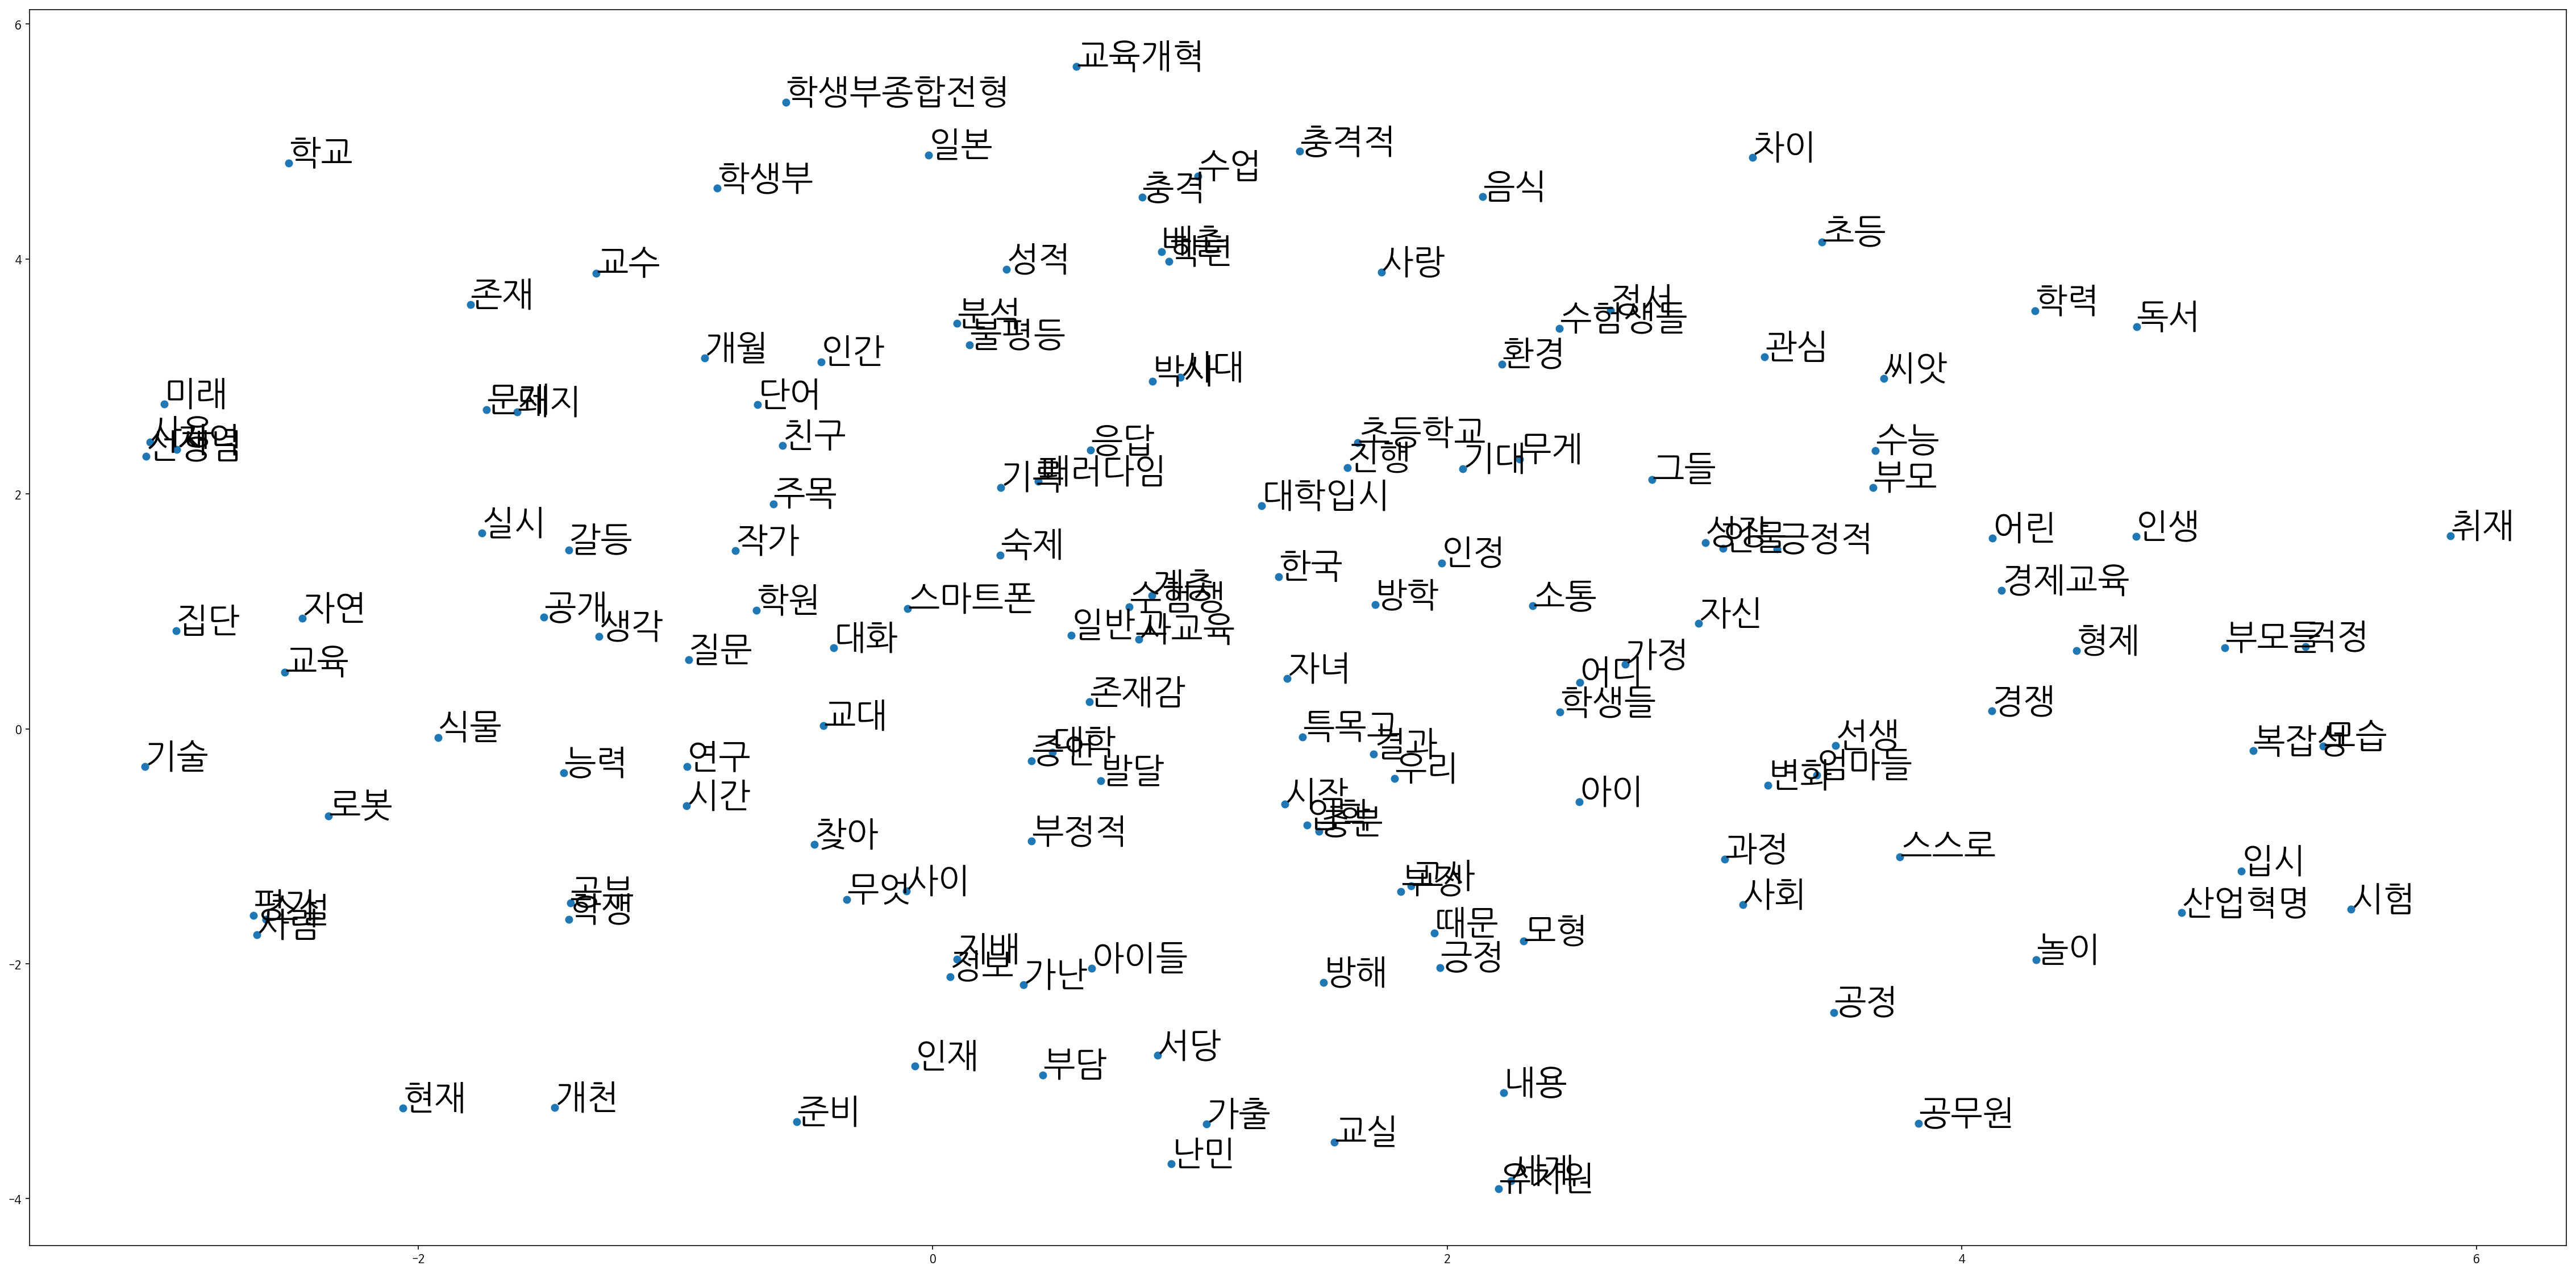

In [143]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30, fontproperties=font)

plt.show()